# Creating Our Dataset and Applying Our Transformer

In this notebook, we:
- download switch-board
- apply updated Transformer, Genderromantic2, to it
- analyze the resulting measures

In [12]:
!python3 -m pip install -r requirements.txt

You are using pip version 19.0.3, however version 19.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [13]:
import convokit
convokit

<module 'convokit' from '/home/kcs3au/cs2/Cornell-Conversational-Analysis-Toolkit/convokit/__init__.py'>

In [14]:
from convokit import Corpus

# Download locally stored corpus

In [15]:
corpus = Corpus(filename='./datasets/switchboard-corpus/corpus')

# Use locally defined Transformer

In [16]:
from convokit import Genderromantic
Genderromantic

convokit.genderromantic.genderromantic.Genderromantic

In [17]:
grr = Genderromantic()

In [18]:
transformed_corpus = grr.fit_transform(corpus)

221616it [00:22, 9878.22it/s] 


In [19]:
next(transformed_corpus.iter_utterances())

Utterance({'id': '4325-0', 'user': User([('name', '1632')]), 'root': '4325-0', 'reply_to': None, 'timestamp': None, 'text': 'Okay.  /', 'meta': {'tag': 'o', 'pos': 'Okay/UH ./.', 'trees': [[['Okay'], ['.'], ['E_S']]], 'female_about_female': False, 'female_about_male': False, 'male_about_female': False, 'male_about_male': False, 'contains_romantic': False}})

In [20]:
transformed_corpus.get_utterance('4325-0').user.meta

{'sex': 'FEMALE',
 'education': 2,
 'birth_year': 1962,
 'dialect_area': 'WESTERN'}

# Running Statistics on Utterance-Level

In [27]:
male_speaking = 0
male_speaking_romantic = 0
male_speaking_about_female = 0
male_speaking_about_female_romantic = 0

male_speaking_not_about_female = 0

female_speaking = 0
female_speaking_romantic = 0
female_speaking_about_male = 0
female_speaking_about_male_romantic = 0

female_speaking_not_about_male = 0

romantic = 0
not_romantic = 0


utterance_ids = transformed_corpus.get_utterance_ids()

for uid in utterance_ids:
    utt=transformed_corpus.get_utterance(uid)
    
    # First get whether it's a male or female speaker
    speaker_gender = utt.user.meta['sex']
    if speaker_gender == "MALE":
        male_speaking += 1
        # Then check whether he's saying something romantic
        if utt.meta['contains_romantic']:
            male_speaking_romantic += 1
    if speaker_gender == "FEMALE":
        female_speaking += 1
        # Then check whether she's saying something romantic
        if utt.meta['contains_romantic']:
            female_speaking_romantic += 1
            
    # Then get whether the utterance is a male speaking about a female:
    mf2=utt.meta["male_about_female"]
    if mf2:
        male_speaking_about_female += 1
        # And whether it was romantic
        if utt.meta["contains_romantic"]:
            male_speaking_about_female_romantic += 1
    else:
        male_speaking_not_about_female += 1
        
    # Then get whether the utterance is a female speaking about a male:
    fm2=utt.meta["female_about_male"]
    if fm2:
        female_speaking_about_male += 1
        # And whether it was romantic
        if utt.meta["contains_romantic"]:
            female_speaking_about_male_romantic += 1
    else:
        female_speaking_not_about_male += 1
        
    # Then register whether the utt is romantic, period.
    rom=utt.meta["contains_romantic"]
    if rom:
        romantic += 1
    else:
        not_romantic += 1

#Creating Percentages - help with graphs later
perc_male_about_female=(float(male_speaking_about_female) / float(male_speaking))*100
perc_male_about_female_rom=(float(male_speaking_about_female_romantic) / float(male_speaking))*100
perc_female_about_male=(float(female_speaking_about_male) / float(female_speaking))*100
perc_female_about_male_rom=(float(female_speaking_about_male_romantic) / float(female_speaking))*100
    
print('male_speaking: ', male_speaking)
print('pct male utterances that were romantic: ', float(male_speaking_romantic) / float(male_speaking))
print('male_speaking_about_female: ', male_speaking_about_female)
print('male_speaking_about_female_romantic: ', male_speaking_about_female_romantic)

print('pct male utterances about females', float(male_speaking_about_female) / float(male_speaking))
print('pct male utterances about females that are romantic', float(male_speaking_about_female_romantic) / float(male_speaking))

print('male_speaking_not_about_female: ', male_speaking_not_about_female)
print('\n')
print('female_speaking: ', female_speaking)
print('pct female utterances that were romantic: ', float(female_speaking_romantic) / float(female_speaking))
print('female_speaking_about_male: ', female_speaking_about_male)
print('female_speaking_about_male_romantic: ', female_speaking_about_male_romantic)

print('pct female utterances about males', float(female_speaking_about_male) / float(female_speaking))
print('pct female utterances about males that are romantic', float(female_speaking_about_male_romantic) / float(female_speaking))

print('female_speaking_not_about_male: ', female_speaking_not_about_male)
print('\n')
print('romantic: ', romantic)
print('pct romantic: ', float(romantic) / float(len(utterance_ids)))
print('not_romantic: ', not_romantic)


male_speaking:  92248
pct male utterances that were romantic:  0.028661868007978493
male_speaking_about_female:  1267
male_speaking_about_female_romantic:  87
pct male utterances about females 0.013734715115774867
pct male utterances about females that are romantic 0.0009431098777209262
male_speaking_not_about_female:  220349


female_speaking:  129368
pct female utterances that were romantic:  0.03580483581720364
female_speaking_about_male:  3467
female_speaking_about_male_romantic:  245
pct female utterances about males 0.02679951765506153
pct female utterances about males that are romantic 0.0018938222744419022
female_speaking_not_about_male:  218149


romantic:  7276
pct romantic:  0.032831564507977765
not_romantic:  214340


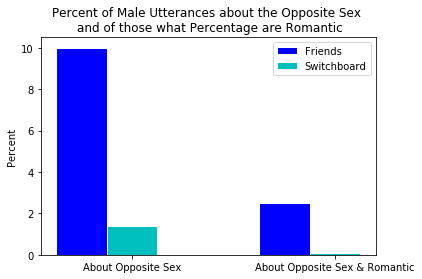

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Comparing Male about Female and Female about Male Conversations (%)
bars1=[10, 2.5]
bars2=[perc_male_about_female, perc_male_about_female_rom]
barWidth=.25 

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

# Make the plot
plt.bar(r1, bars1, color='b', width=barWidth, edgecolor='white', label='Friends')
plt.bar(r2, bars2, color='c', width=barWidth, edgecolor='white', label='Switchboard')
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['About Opposite Sex', 'About Opposite Sex & Romantic'])
 
# Create legend & Show graphic
plt.title('Percent of Male Utterances about the Opposite Sex \n and of those what Percentage are Romantic')
plt.ylabel('Percent')
plt.xlabel('')
plt.legend()
plt.show()



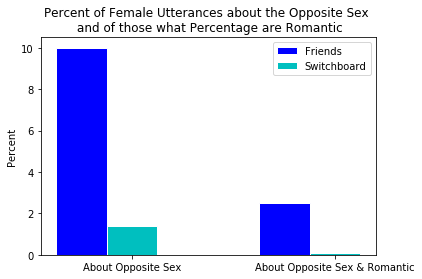

In [37]:
#Comparing Male about Female and Female about Male Conversations (%)
bars3=[6, 2]
bars4=[perc_female_about_male, perc_female_about_male_rom]
barWidth=.25 

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

# Make the plot
plt.bar(r1, bars1, color='b', width=barWidth, edgecolor='white', label='Friends')
plt.bar(r2, bars2, color='c', width=barWidth, edgecolor='white', label='Switchboard')
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['About Opposite Sex', 'About Opposite Sex & Romantic'])
 
# Create legend & Show graphic
plt.title('Percent of Female Utterances about the Opposite Sex \n and of those what Percentage are Romantic')
plt.ylabel('Percent')
plt.xlabel('')
plt.legend()
plt.show()
